In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import cv2
from mpl_toolkits.mplot3d import Axes3D

## Ejemplo en 2d

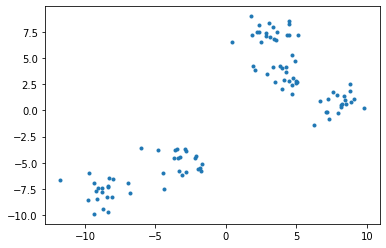

In [2]:
X,y = make_blobs(n_samples = 100, centers=5, n_features = 2)
plt.plot(X[:,0],X[:,1],'.')
plt.show()

In [11]:
model = KMeans(n_clusters=5)
model.fit(X)
print(model.cluster_centers_)
grupo = model.predict(X)
print(grupo)

[[ 4.0764579   3.39968046]
 [-8.77567849 -7.75086548]
 [ 8.03360279  0.67551924]
 [-3.19168915 -4.92060196]
 [ 3.10164019  7.50010437]]
[1 0 0 4 1 4 3 2 4 0 2 2 0 3 1 2 0 0 0 2 4 1 2 4 1 1 4 1 4 3 2 3 1 2 2 2 2
 1 0 2 0 3 3 4 1 4 2 1 4 2 1 1 3 0 3 4 2 3 4 3 4 0 1 1 1 3 1 3 0 3 2 0 3 3
 3 4 3 1 0 0 4 1 0 1 4 4 3 3 0 0 2 0 2 2 4 2 0 4 4 3]


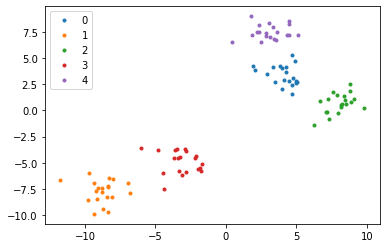

In [13]:
plt.plot(X[grupo==0,0],X[grupo==0,1],'.',label='0')
plt.plot(X[grupo==1,0],X[grupo==1,1],'.',label='1')
plt.plot(X[grupo==2,0],X[grupo==2,1],'.',label='2')
plt.plot(X[grupo==3,0],X[grupo==3,1],'.',label='3')
plt.plot(X[grupo==4,0],X[grupo==4,1],'.',label='4')
plt.legend()
plt.show()

## Ejemplo con una imagen

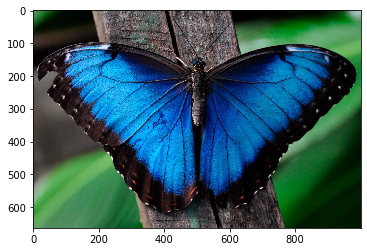

In [5]:
img = cv2.imread('mariposa.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

plt.figure()
plt.imshow(img)
plt.show()

(664, 1000, 3)


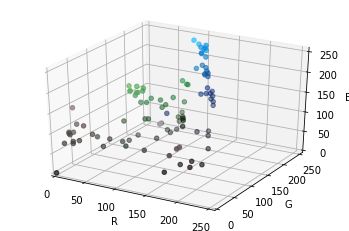

In [6]:
print(img.shape)

nrows,ncols,nch = img.shape

# Vectorizar la imagen
Ximg = np.reshape(img,(nrows*ncols,3))
Ximg_hsv = np.reshape(img_hsv,(nrows*ncols,3))

idx = np.random.permutation(nrows*ncols)
idx = idx[:100]

# Graficar
fig = plt.figure()
ax = fig.gca(projection='3d')
R = Ximg_hsv[idx,0]
G = Ximg_hsv[idx,1]
B = Ximg_hsv[idx,2]
ax.scatter(R, G, B, c=Ximg[idx,:]/255)
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_zlim(0, 255)
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
plt.show()

In [7]:
model = KMeans(n_clusters=5)
model.fit(Ximg_hsv)
print(model.cluster_centers_)
g = model.predict(Ximg_hsv)
print(g[:100])

[[ 83.28651635 230.26369363  43.22764462]
 [ 14.24321683  52.16126049  72.12337073]
 [101.29028494 243.45472425 183.94772229]
 [154.87253999  65.65445566  53.62722046]
 [ 66.32748558 128.39423973 145.17762544]]
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 0 0 4 0 4 4 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [8]:
print(Ximg_hsv[:10])
Ximg_hsv[ g==0 ,:] = model.cluster_centers_[0]
Ximg_hsv[ g==1 ,:] = model.cluster_centers_[1]
Ximg_hsv[ g==2 ,:] = model.cluster_centers_[2]
print(Ximg_hsv[:10])

[[ 62 125 149]
 [ 62 127 150]
 [ 62 127 150]
 [ 63 133 153]
 [ 64 134 152]
 [ 65 139 152]
 [ 65 145 151]
 [ 65 148 150]
 [ 67 153 150]
 [ 67 149 154]]
[[ 62 125 149]
 [ 62 127 150]
 [ 62 127 150]
 [ 63 133 153]
 [ 64 134 152]
 [ 65 139 152]
 [ 65 145 151]
 [ 65 148 150]
 [ 67 153 150]
 [ 67 149 154]]


In [9]:
print('Ximg_hsv',Ximg_hsv.shape)
img_hsv = np.reshape(Ximg_hsv,(nrows,ncols,nch))
print('img_hsv',img_hsv.shape)

Ximg_hsv (664000, 3)
img_hsv (664, 1000, 3)


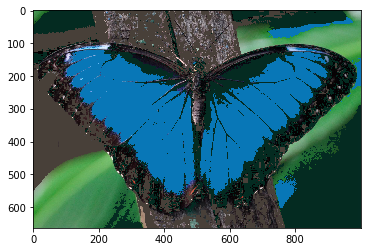

In [10]:
img = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)

plt.figure()
plt.imshow(img)
plt.show()